## About Dataset
### Weather Forecast Dataset
- This dataset is ideal for beginners looking to practice machine learning, specifically using classification techniques.
- With 2,500 weather observations, it’s a simple yet practical dataset for learning how to predict rainfall based on various weather conditions.
Perfect for use with Python libraries like scikit-learn, this dataset enables experimentation with algorithms such as logistic regression , decision trees , and random forests .
- The dataset's straightforward structure makes it accessible for those new to classification problems and interested in weather data analysis.

In [24]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Load dataset
data = pd.read_csv('weather_forecast_data.csv')
data.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [27]:
data.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [28]:
# to Cheacking null values in %
data.isnull().sum() / len(data) * 100

Temperature    0.0
Humidity       0.0
Wind_Speed     0.0
Cloud_Cover    0.0
Pressure       0.0
Rain           0.0
dtype: float64

<Axes: >

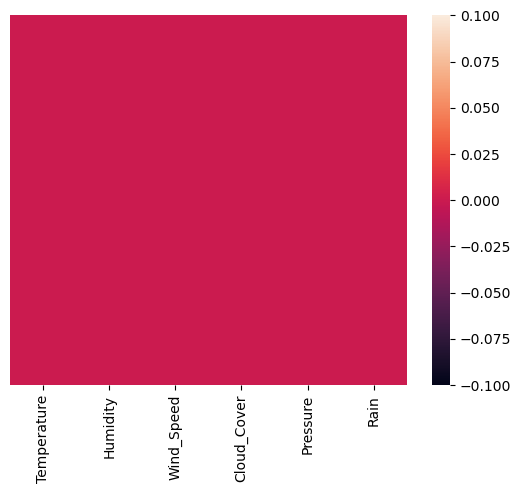

In [29]:
# null values through graph
sns.heatmap(data.isnull(), yticklabels=False)

<Figure size 1600x800 with 0 Axes>

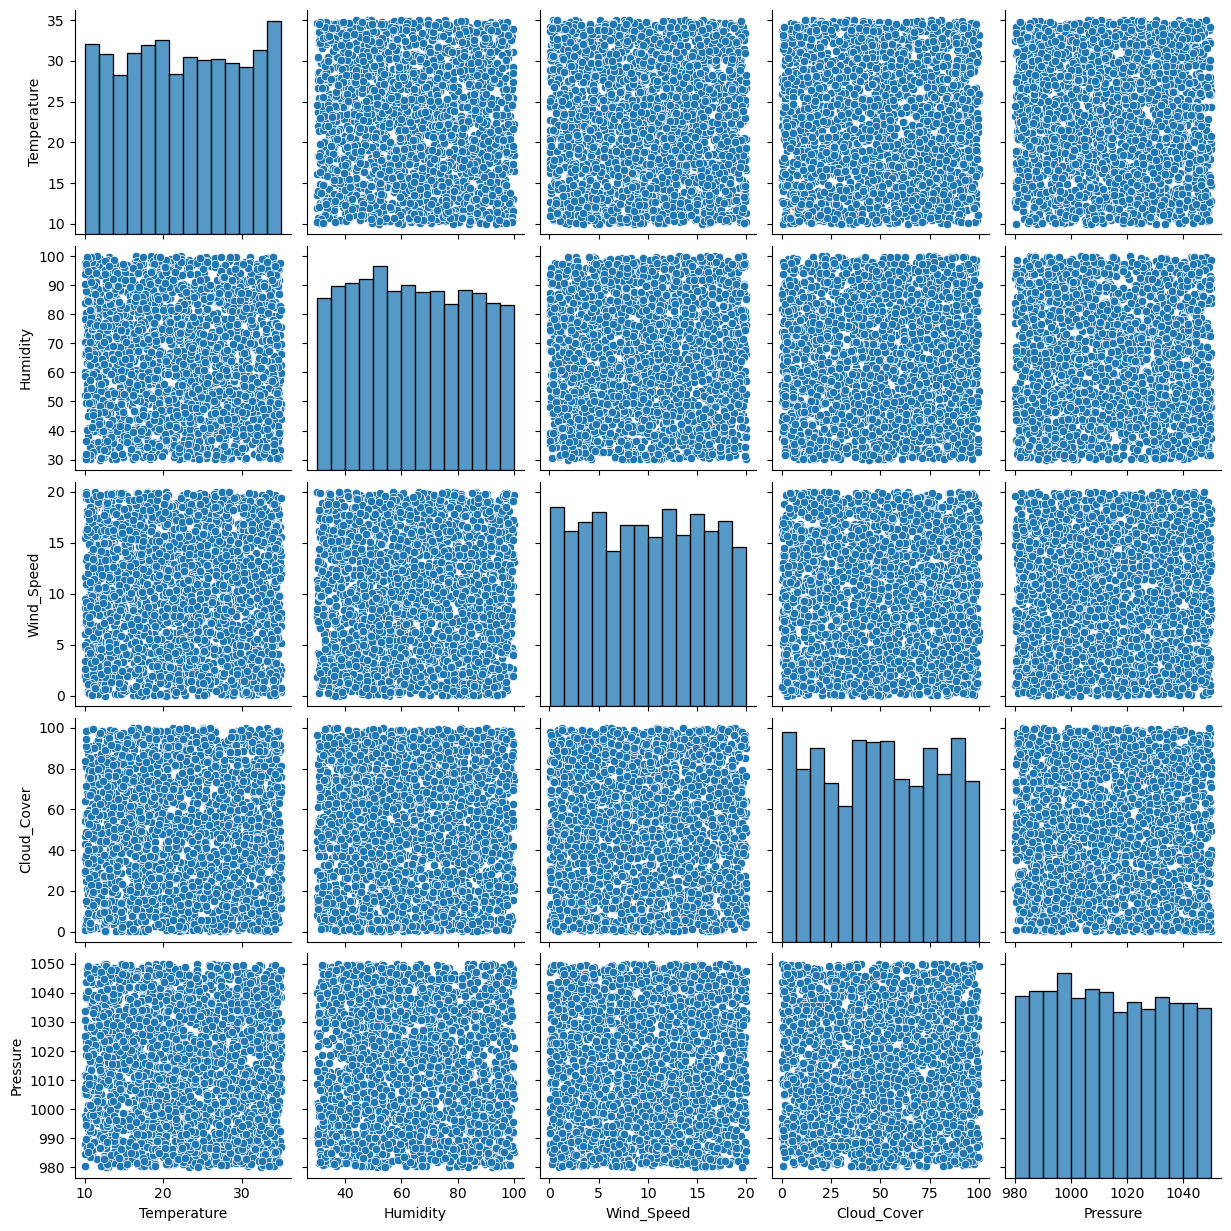

In [30]:
plt.figure(figsize=(16,8))
sns.pairplot(data)
plt.show()

<Axes: xlabel='Temperature', ylabel='Humidity'>

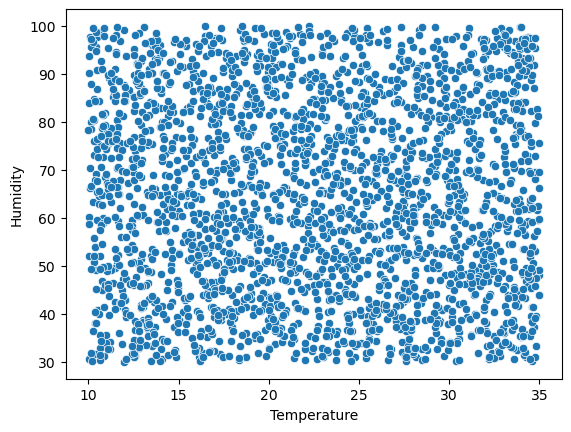

In [31]:
sns.scatterplot(data= data, x=data['Temperature'], y = data['Humidity'])

In [32]:
# df = data.drop(columns=['Rain'], axis=1, inplace=True)

In [33]:
# sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

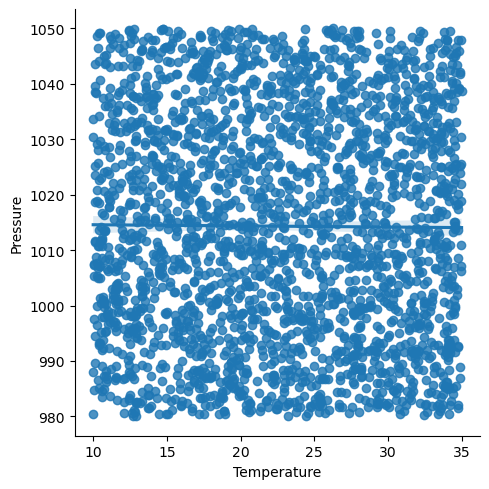

In [34]:
sns.lmplot(x='Temperature', y='Pressure', data=data)

In [35]:
data.head().T

,0,1,2,3,4
Temperature,23.720338,27.879734,25.069084,23.62208,20.59137
Humidity,89.592641,46.489704,83.072843,74.367758,96.858822
Wind_Speed,7.335604,5.952484,1.371992,7.050551,4.643921
Cloud_Cover,50.501694,4.990053,14.855784,67.255282,47.676444
Pressure,1032.378759,992.61419,1007.23162,982.632013,980.825142
Rain,rain,no rain,no rain,rain,no rain


In [36]:
data.groupby('Rain')[['Humidity','Temperature']].mean()

# Chance of Rain or NO-Rain on the base of average values

,Humidity,Temperature
Rain,,
no rain,61.455151,23.319913
rain,84.480176,17.442619


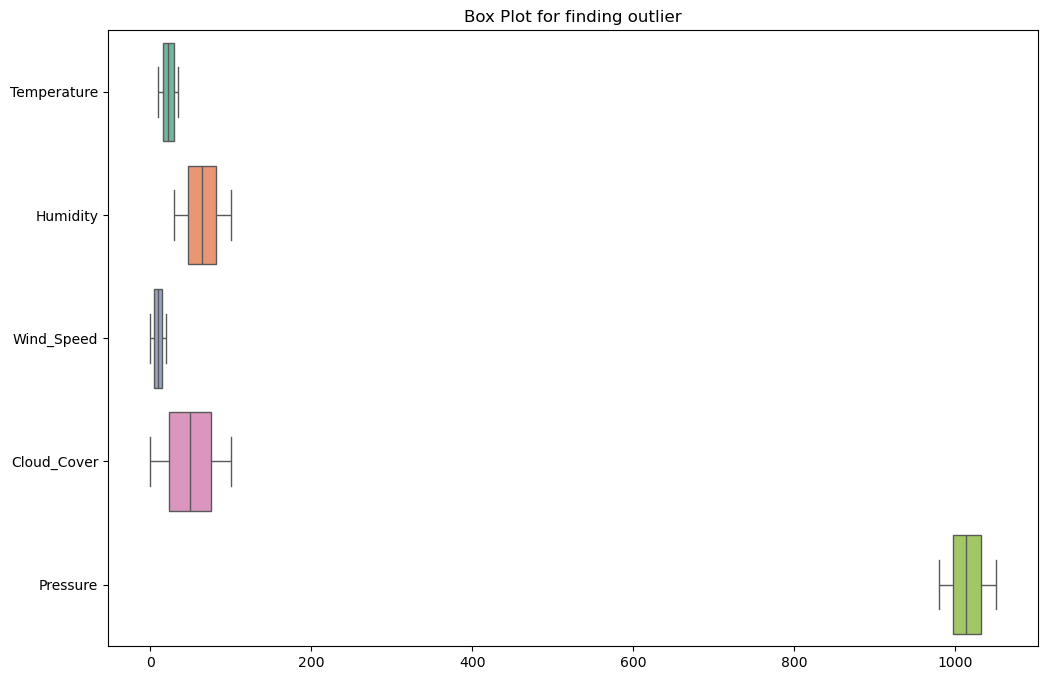

In [37]:
# Creating a box plot for all four columns
plt.figure(figsize=(12, 8))  # Set the figure size
sns.boxplot(data=data , orient="h", palette="Set2")

# Adding a title
plt.title('Box Plot for finding outlier')

# Display the plot
plt.show()
    

### There is no Outlier  in the above Graph

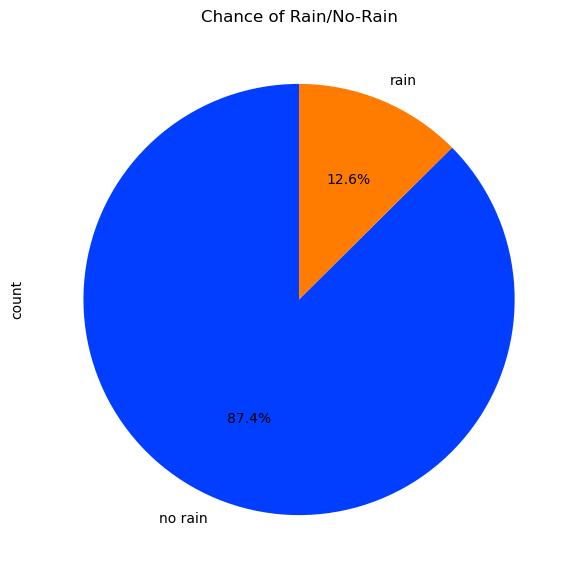

In [38]:

# Grouping by 'Category' and summing the 'Values'
category_counts = data['Rain'].value_counts()
color = sns.color_palette("bright", len(category_counts))


plt.figure(figsize=(7, 7))  # Set the figure size
category_counts.plot.pie(autopct='%1.1f%%', colors=color, startangle=90)

# Title for the pie chart
plt.title('Chance of Rain/No-Rain')

# Display the plot
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import  SVC 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [40]:
x  =  data[['Temperature',	'Humidity',	'Wind_Speed',	'Cloud_Cover',	'Pressure']]
y = data['Rain']
encode = LabelEncoder()
y = encode.fit_transform(y)

In [55]:
import warnings
warnings.filterwarnings('ignore')
# split the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('Support vectore machine', SVC(random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)),
   ( 'XGBClassifier', XGBClassifier(random_state=42))
]
    
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('Scaler', StandardScaler()), 
        # ('encoder', LabelEncoder()),
        ('model', model)
    ])


    score = cross_val_score(pipeline, x_train, y_train, cv =5)
    mean_accuracy  = score.mean()
    
    pipeline.fit(x_train, y_train)
    
    y_pred = pipeline.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model:", name)
    print(f"Cross validation score: {mean_accuracy:.3f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("--"*25)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)
   

Model: LogisticRegression
Cross validation score: 0.928
Accuracy: 0.93
--------------------------------------------------
Model: DecisionTreeClassifier
Cross validation score: 0.998
Accuracy: 1.00
--------------------------------------------------
Model: naive_bayes
Cross validation score: 0.963
Accuracy: 0.97
--------------------------------------------------
Model: AdaBoostClassifier
Cross validation score: 0.998
Accuracy: 1.00
--------------------------------------------------
Model: GradientBoostingClassifier
Cross validation score: 0.999
Accuracy: 1.00
--------------------------------------------------
Model: RandomForestClassifier
Cross validation score: 0.999
Accuracy: 1.00
--------------------------------------------------
Model: Support vectore machine
Cross validation score: 0.971
Accuracy: 0.98
--------------------------------------------------
Model: KNeighborsClassifier
Cross validation score: 0.961
Accuracy: 0.97
--------------------------------------------------
Model: X